# 微信指数与本案和竞争对手相关性分析

## 项目背景介绍

> 微信指数是微信官方提供的基于微信大数据分析的移动端指数。
应用场景有以下三种，
* 1.捕捉热词，看懂趋势
微信指数整合了微信上的搜索和浏览行为数据，基于对海量数据的分析，可以形成当日、7日、30日以及90日的“关键词”动态指数变化情况，方便看到某个词语在一段时间内的热度趋势和最新指数动态。

> * 2.监测舆情动向，形成研究结果
微信指数可以提供社会舆情的监测，能实时了解互联网用户当前最为关注的社会问题、热点事件、舆论焦点等等，方便政府、企业对舆情进行研究，从而形成有效的舆情应对方案。

> * 3.洞察用户兴趣，助力精准营销
微信指数提供的关键词的热度变化，可以间接获取用户的兴趣点及变化情况，比如日常消费、娱乐、出行等，从而对品牌企业的精准营销和投放形成决策依据，也能对品牌投放效果形成有效监测、跟踪和反馈。

由于本产品的主战场在移动端，而微信作为占据中国用户使用时间最长的移动应用，与本产品的用户人群重合度极高，合理充分的分析各个竞争对手与微信指数间的相关性，能够比较客观的发现本产品与竞争对手间的实力差别，甚至可以进一步发现产品内部各个部门间与微信指数的关系，客观评价各个部门对公司的贡献程度。  

引入科学计算和绘图相关包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

## 数据获取

> 微信指数的获取方法如下
> * 1.打开微信。在顶部搜索框内输入“微信指数”四个关键字。

> * 2.再点击“微信指数”进入主页面，然后再点击微信指数里面的搜索框，输入自己想要的关键词得出的数据。

> * 3.目前微信指数只支持7日、30日、90日内的三个阶段的数据。

按照上述方法分别输入与本产品相关的关键词，依次输入各个竞争对手的关键词得到相应的微信指数，并且在相同时间段内收集以下数据，包括PV、访客数量、新访客数量、启动次数、部门1带来的新增注册用户数、部门2带来的新增注册用户数、部门3带来的新增注册用户数、部门4带来的新增注册用户数、自然流量产生的新增注册用户数、总计新增注册用户数，然后对上述数据进行相关性分析。

In [2]:
df = pd.read_csv("wechat_data.csv", encoding='gbk', 
                  parse_dates=[u'date', u'current', u'competitor_keyword1', u'competitor_keyword2', 
                               u'competitor_keyword3', u'competitor_keyword4', u'pv', u'uv', u'new_uv', 
                               u'launches', u'department1', u'department2', u'department3', u'department4', 'natural_flow', 'all'])

原始数据加载成功后，以dataframe形式存储，通过以下方法非常容易可以对数据进行探查。

In [3]:
df.head()

,date,current,competitor_keyword1,competitor_keyword2,competitor_keyword3,competitor_keyword4,pv,uv,new_uv,launches,department1,department2,department3,department4,natural_flow,all
0,2016-12-28,55154,32639,6264,42789,14368,1422294,68229,9183,145258,93,1982,1448,126,1825,5519
1,2016-12-29,66562,47962,9410,37535,13130,1696813,79281,10830,163905,82,2102,1487,97,2370,6182
2,2016-12-30,61442,29138,6611,39865,16680,1688683,80199,11188,167161,107,2245,1685,132,1846,6102
3,2016-12-31,48100,24858,5900,33460,12298,1410730,72485,11926,148706,103,3735,1783,111,2184,7983
4,2017-01-01,79754,30667,3504,25985,9430,1141197,57703,10153,105198,49,1613,1938,72,1930,5621


## 数据清洗

由于微信指数与产品间的访客数、应用的启动次数不在同一数量级上，本文主要分析各种指标间的相关性，不同评价指标往往具有不同的量纲和量纲单位，这样的情况会影响到数据分析的结果，为了消除指标之间的量纲影响，需要进行数据标准化处理，以解决数据指标之间的可比性，本文拟采用离差标准化，转换函数如下 $$x^*=\frac{x-min}{max-min}$$ 
该函数是对原始数据的线性变换，使结果值映射到[0 - 1]之间，其中max为样本数据的最大值，min为样本数据的最小值。

下面的df_normalized方法能够将原始数据标准化处理，使各指标处于同一数量级，适合进行综合对比评价。

In [4]:
def df_normalized(df):
    result = pd.DataFrame()
    min_max_scaler = preprocessing.MinMaxScaler()
    for item in df.columns:
        if item == 'date':
            result[item] = df[item]
        else:
            np_scale = min_max_scaler.fit_transform(df[item])
            st = item + '_nor'
            result[st] = pd.DataFrame(np_scale)
    return result

In [6]:
normalized = df_normalized(df)

In [7]:
normalized.head()

,date,current_nor,competitor_keyword1_nor,competitor_keyword2_nor,competitor_keyword3_nor,competitor_keyword4_nor,pv_nor,uv_nor,new_uv_nor,launches_nor,department1_nor,department2_nor,department3_nor,department4_nor,natural_flow_nor,all_nor
0,2016-12-28,0.673861,0.209573,0.419770,0.449234,0.188282,0.796087,0.755430,0.723850,0.822929,0.138675,0.436600,0.226955,0.952756,0.400720,0.473989
1,2016-12-29,0.825105,0.347860,0.637547,0.381769,0.169433,1.000000,0.981243,0.889661,0.973677,0.121726,0.464468,0.239352,0.724409,0.578999,0.543808
2,2016-12-30,0.757225,0.177978,0.443791,0.411688,0.223484,0.993961,1.000000,0.925702,1.000000,0.160247,0.497678,0.302289,1.000000,0.407589,0.535383
3,2016-12-31,0.580342,0.139352,0.394573,0.329443,0.156765,0.787497,0.842388,1.000000,0.850804,0.154083,0.843706,0.333439,0.834646,0.518155,0.733467
4,2017-01-01,1.000000,0.191777,0.228714,0.233458,0.113097,0.587288,0.540363,0.821504,0.499070,0.070878,0.350906,0.382708,0.527559,0.435067,0.484730


如上述表中所示，各个指标通过线性变换被映射[0 - 1]之间。

In [8]:
data = normalized.set_index('date')

In [9]:
data.head()

,current_nor,competitor_keyword1_nor,competitor_keyword2_nor,competitor_keyword3_nor,competitor_keyword4_nor,pv_nor,uv_nor,new_uv_nor,launches_nor,department1_nor,department2_nor,department3_nor,department4_nor,natural_flow_nor,all_nor
date,,,,,,,,,,,,,,,
2016-12-28,0.673861,0.209573,0.419770,0.449234,0.188282,0.796087,0.755430,0.723850,0.822929,0.138675,0.436600,0.226955,0.952756,0.400720,0.473989
2016-12-29,0.825105,0.347860,0.637547,0.381769,0.169433,1.000000,0.981243,0.889661,0.973677,0.121726,0.464468,0.239352,0.724409,0.578999,0.543808
2016-12-30,0.757225,0.177978,0.443791,0.411688,0.223484,0.993961,1.000000,0.925702,1.000000,0.160247,0.497678,0.302289,1.000000,0.407589,0.535383
2016-12-31,0.580342,0.139352,0.394573,0.329443,0.156765,0.787497,0.842388,1.000000,0.850804,0.154083,0.843706,0.333439,0.834646,0.518155,0.733467
2017-01-01,1.000000,0.191777,0.228714,0.233458,0.113097,0.587288,0.540363,0.821504,0.499070,0.070878,0.350906,0.382708,0.527559,0.435067,0.484730


## 数据探查

下图为本产品的微信指数(current_nor)与对应的日活跃用户数(all_nor)间的关系。

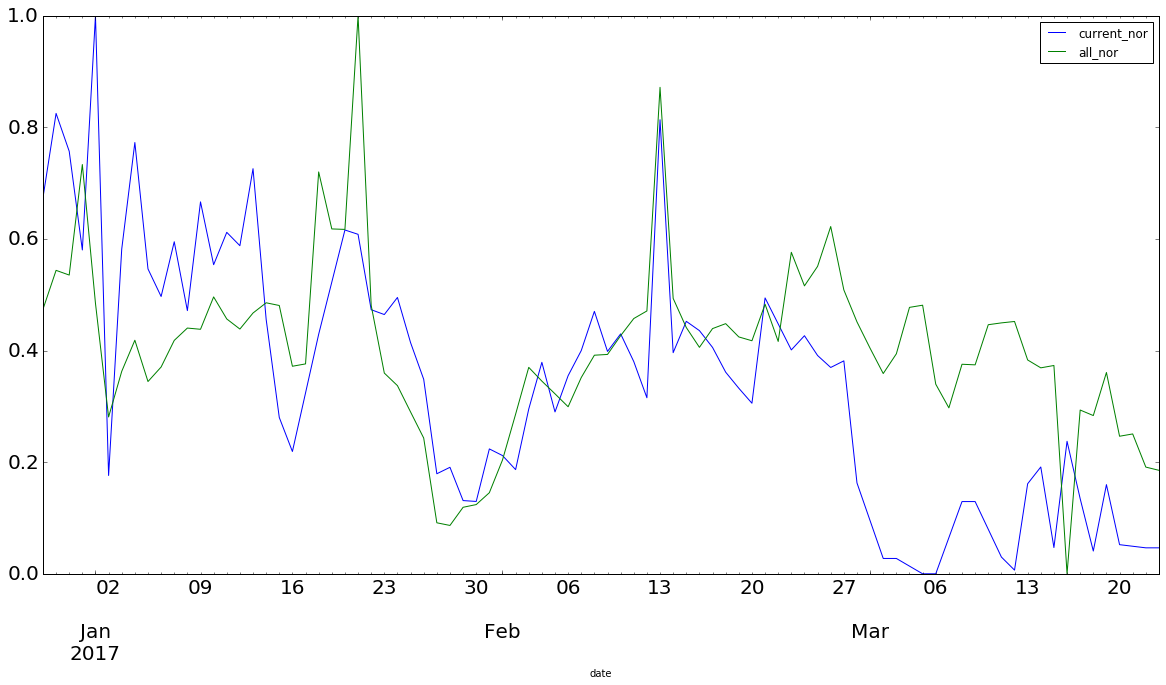

In [10]:
plot = data[['current_nor', 'all_nor']].plot(figsize=(20, 10), fontsize=20)
fig = plot.get_figure()

## 数据计算

通过pandas中计算相关关系的方法得到各指标间的相关关系系数矩阵。

In [11]:
corr_result = data.corr()
corr_result

,current_nor,competitor_keyword1_nor,competitor_keyword2_nor,competitor_keyword3_nor,competitor_keyword4_nor,pv_nor,uv_nor,new_uv_nor,launches_nor,department1_nor,department2_nor,department3_nor,department4_nor,natural_flow_nor,all_nor
current_nor,1.000000,0.319319,0.256360,0.216808,0.057774,0.419055,0.590282,0.565802,0.590984,-0.487185,0.646741,-0.180519,0.516910,0.730586,0.511528
competitor_keyword1_nor,0.319319,1.000000,0.224956,0.176306,0.159633,0.095338,0.215642,0.168993,0.167436,-0.208761,0.135216,-0.009691,0.111955,0.184174,0.145282
competitor_keyword2_nor,0.256360,0.224956,1.000000,0.586304,0.407344,0.500739,0.476628,0.461982,0.521846,0.098612,0.185298,0.216245,0.392396,0.373121,0.374738
competitor_keyword3_nor,0.216808,0.176306,0.586304,1.000000,0.778984,0.539522,0.453107,0.440469,0.514007,0.113688,0.002295,0.273704,0.395398,0.357437,0.310819
competitor_keyword4_nor,0.057774,0.159633,0.407344,0.778984,1.000000,0.332215,0.271995,0.302536,0.309042,0.137202,-0.014225,0.208515,0.227351,0.143965,0.177798
pv_nor,0.419055,0.095338,0.500739,0.539522,0.332215,1.000000,0.878603,0.740295,0.907580,0.226514,0.330349,0.545246,0.667853,0.540394,0.653283
uv_nor,0.590282,0.215642,0.476628,0.453107,0.271995,0.878603,1.000000,0.775979,0.978876,-0.034607,0.455185,0.267750,0.733953,0.583961,0.597389
new_uv_nor,0.565802,0.168993,0.461982,0.440469,0.302536,0.740295,0.775979,1.000000,0.801466,-0.035052,0.430017,0.217168,0.798144,0.506814,0.543992
launches_nor,0.590984,0.167436,0.521846,0.514007,0.309042,0.907580,0.978876,0.801466,1.000000,0.008752,0.444853,0.254610,0.782249,0.615709,0.593885
department1_nor,-0.487185,-0.208761,0.098612,0.113688,0.137202,0.226514,-0.034607,-0.035052,0.008752,1.000000,-0.302279,0.296323,-0.063312,-0.283212,-0.077217


## 数据可视化

上述的相关关系矩阵尽管能够说明各个指标间的相关关系，但是尚未做到一目了然，不能够直接观察出各个指标间的重要程度。下面通过数据可视化的方式表述相关关系矩阵。

In [12]:
myfont = matplotlib.font_manager.FontProperties(fname='D:\Update\simsun.ttc')

In [14]:
data.columns = df.columns[1:]
data = data.rename(columns={'current':u'本产品', 'competitor_keyword1':u'竞对1', 'competitor_keyword2':'竞对2',
                            'competitor_keyword3':'竞对3','competitor_keyword4':'竞对4', 'uv':u'访客', 'new_uv':u'新访客',
                            'launches':u'启动次数', 'department1':u'部门1','department2':u'部门2', 
                            'department3':u'部门3', 'department4':u'部门4', 'natural_flow':u'自然流量', 'all':u'总计'})

In [15]:
import sys
reload(sys)
sys.setdefaultencoding('utf8') 

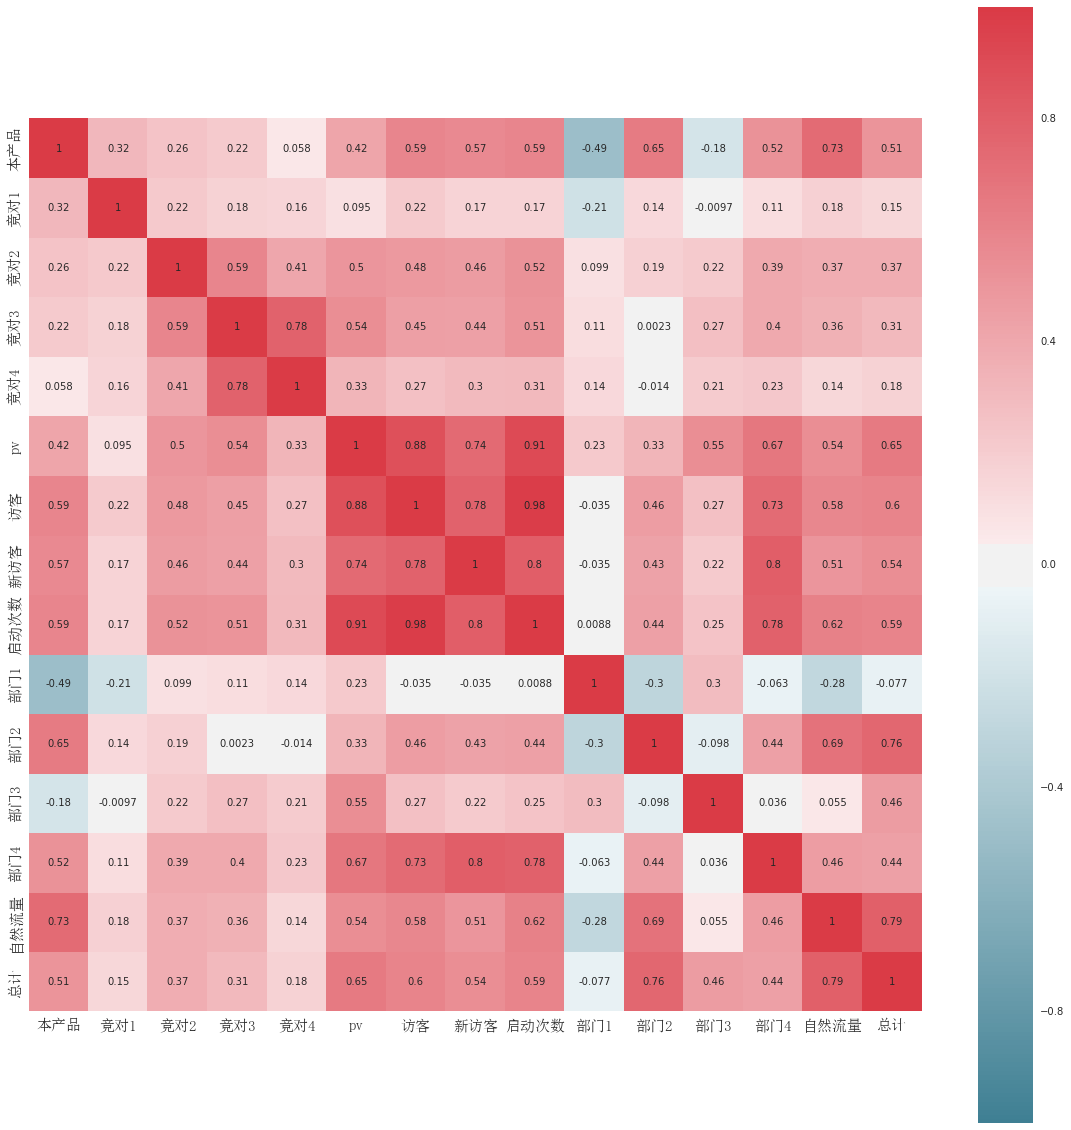

In [16]:
import seaborn as sns

f, ax = plt.subplots(figsize=(20, 20))
corr = data.corr()
ax.set_xticklabels(data.columns, fontproperties=myfont, fontsize=15)
ax.set_yticklabels(data.columns, fontproperties=myfont, fontsize=15)
plot = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
fig = plot.get_figure()

相关关系矩阵中行与列交叉的部分为对应行与列之间的相关系数，相关系数越高颜色越趋近于红色，1表示完全正相关，通俗讲就是A增长B一定会增长，负数表示负相关关系，即A增长B减小。

## 相关关系矩阵得出的结论

如果微信指数出现剧烈波动的情况下，本产品下属各部门在相应时间段内原因排查优先级如下：
* 1.优先排查部门2是否有相应活动
* 2.部门4是否有相应动作
* 3.部门3是否采取了相应措施
* 4.其余部门是否有相应活动
* 5.如果以上部门都不相关，接下来考虑是否被竞争对手抹黑导致微信指数热度提升
#### 推论：当前情况下，部门2能够带来大量用户，并提升本产品的微信指数，扩大影响力。

## 推理过程

* 1.在本产品的各个部门中，本产品的微信指数与自然流量的相关系数为0.73、与部门2的相关系数0.65、与部门4的相关系数为0.52，因此我们判断与微信指数相关的优先级分别为自然流量、部门2、部门4
* 2.除本产品的微信指数和总计指标外，自然流量与部门2相关系数最高，达到0.65，与部门3的相关系数最小，仅为0.055，说明自然流量中部门3带来的新增用户没有被划分到自然流量中，部门2由于统计规则（技术或产品原因）的原因有一部分用户被计入自然流量中，自然流量受部门2影响最大，此时我们判断与微信指数相关的优先级调整为部门2、部门4
* 3.部门4与新访客相关系数最高，为0.8，与启动次数相关系数为0.78，与访客、pv的相关系数分别为0.73、0.67，与本产品微信指数间的相关系数为0.52，主要原因与部门4的使用场景有关（结合业务使用场景很容易分析）
* 4.部门3与PV相关系数最高，为0.55，与本产品微信指数相关系数最低，为-0.18，原因主要与部门3的业务流程有关
* 5.部门2与总计的相关性最高，为0.79，说明部门2对总计贡献度大
* 6.部门1与其他指标相关性均比较低，说明部门1对其余各项指标包括本产品微信指数在内贡献度低
* 7.PV、访客、新访客、启动次数四个因素间相互有强相关关系
* 8.各个相关竞争对手中，本产品与竞对1相关性最高，为0.32
* 9.竞争对手间，竞对3与竞对4相关性最高，为0.78